# NEM

In [28]:
pip install tensorflow==2.2

^C
Note: you may need to restart the kernel to use updated packages.


In [30]:
!pip install keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import *
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Bidirectional, Input
from tensorflow.python.keras.models import Model, Sequential
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional

In [3]:
path = '../data\cryptocurrencypricehistory\coin_NEM.csv'
data = pd.read_csv(path)
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,NEM,XEM,2015-04-02 23:59:59,0.000323,0.000227,0.000242,0.000314,2.854940e+04,2.823534e+06
1,2,NEM,XEM,2015-04-03 23:59:59,0.000330,0.000291,0.000309,0.000310,2.067790e+04,2.792457e+06
2,3,NEM,XEM,2015-04-04 23:59:59,0.000318,0.000251,0.000310,0.000277,2.355020e+04,2.488770e+06
3,4,NEM,XEM,2015-04-05 23:59:59,0.000283,0.000218,0.000272,0.000232,2.680020e+04,2.087388e+06
4,5,NEM,XEM,2015-04-06 23:59:59,0.000299,0.000229,0.000232,0.000289,2.251150e+04,2.598354e+06
...,...,...,...,...,...,...,...,...,...,...
2154,2155,NEM,XEM,2021-02-23 23:59:59,0.736226,0.448790,0.707942,0.536204,1.941563e+09,4.825836e+09
2155,2156,NEM,XEM,2021-02-24 23:59:59,0.566093,0.498564,0.538532,0.534637,6.256875e+08,4.811729e+09
2156,2157,NEM,XEM,2021-02-25 23:59:59,0.540221,0.493645,0.534928,0.495290,2.707985e+08,4.457607e+09
2157,2158,NEM,XEM,2021-02-26 23:59:59,0.561270,0.435946,0.498094,0.516575,6.791638e+08,4.649176e+09


- Date : date of observation
- Open : Opening price on the given day
- High : Highest price on the given day
- Low : Lowest price on the given day
- Close : Closing price on the given day
- Volume : Volume of transactions on the given day
- Market Cap : Market capitalization in USD

### Definitions:
- Opening price: The price from the first transaction of a business day
- Closing price : The price paid in the last transaction of a business day
- Market capitalization: Refers to the total dollar market value of a company's outstanding shares of stock

# Bitcoin dataset EDA

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Name       2862 non-null   object 
 2   Symbol     2862 non-null   object 
 3   Date       2862 non-null   object 
 4   High       2862 non-null   float64
 5   Low        2862 non-null   float64
 6   Open       2862 non-null   float64
 7   Close      2862 non-null   float64
 8   Volume     2862 non-null   float64
 9   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 223.7+ KB


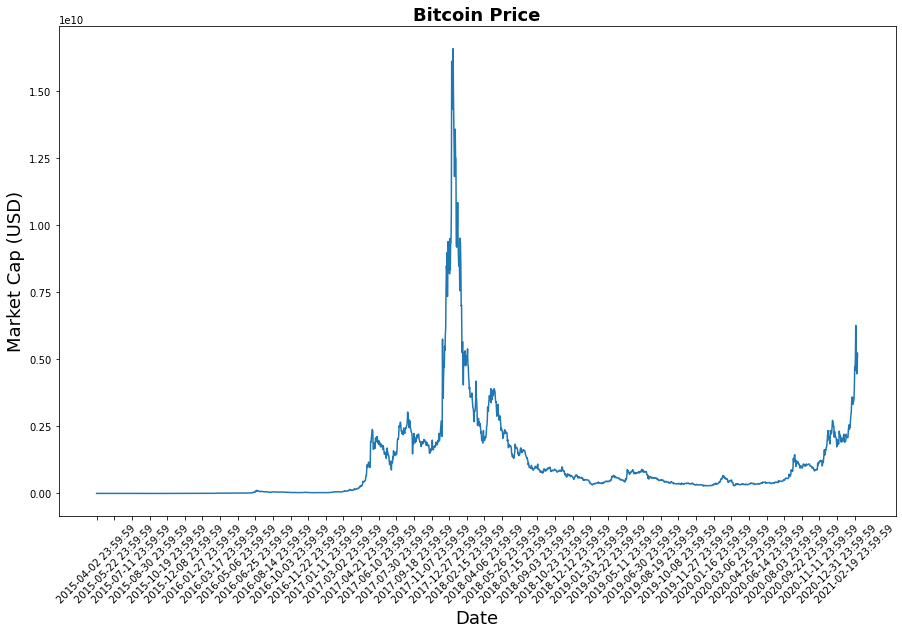

In [20]:
mcap = data[['Marketcap']]

plt.figure(figsize = (15,9))
plt.plot(mcap)
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("NEM Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Market Cap (USD)',fontsize=18)
plt.show()

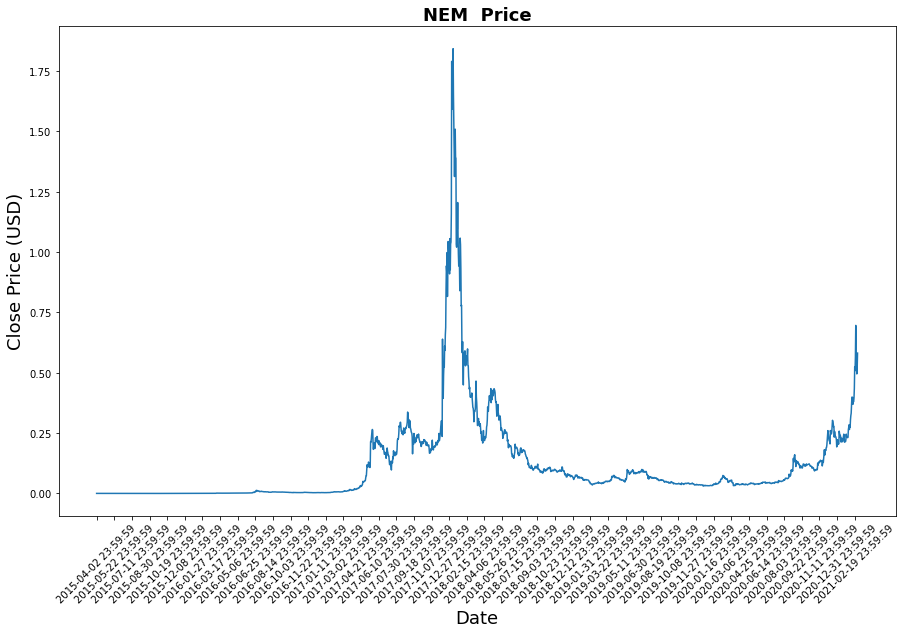

In [21]:
price = data[['Close']]

plt.figure(figsize = (15,9))
plt.plot(price)
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("NEM  Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

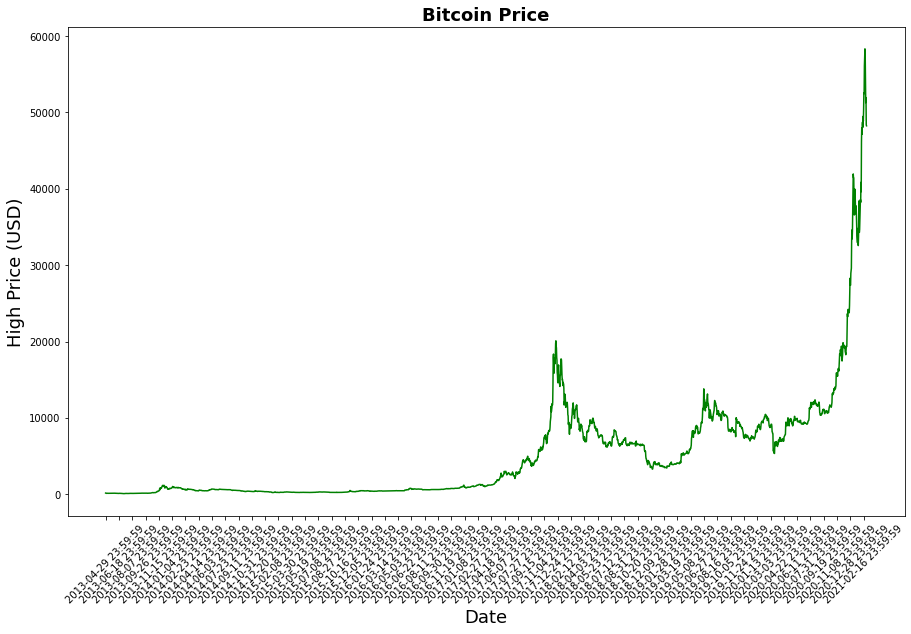

In [ ]:
price = data[['Close']]
plt.figure(figsize = (15,9))
plt.plot(data[['High']],'#008000')
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('High Price (USD)',fontsize=18)
plt.show()

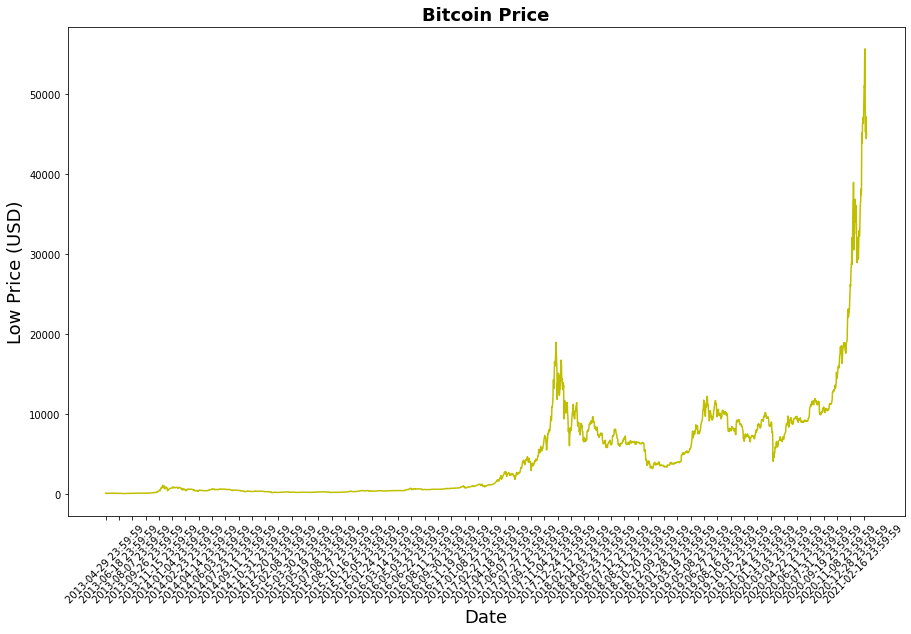

In [ ]:
price = data[['Close']]
plt.figure(figsize = (15,9))
plt.plot(data[['Low']],'y')
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("NEM  Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Low Price (USD)',fontsize=18)
plt.show()

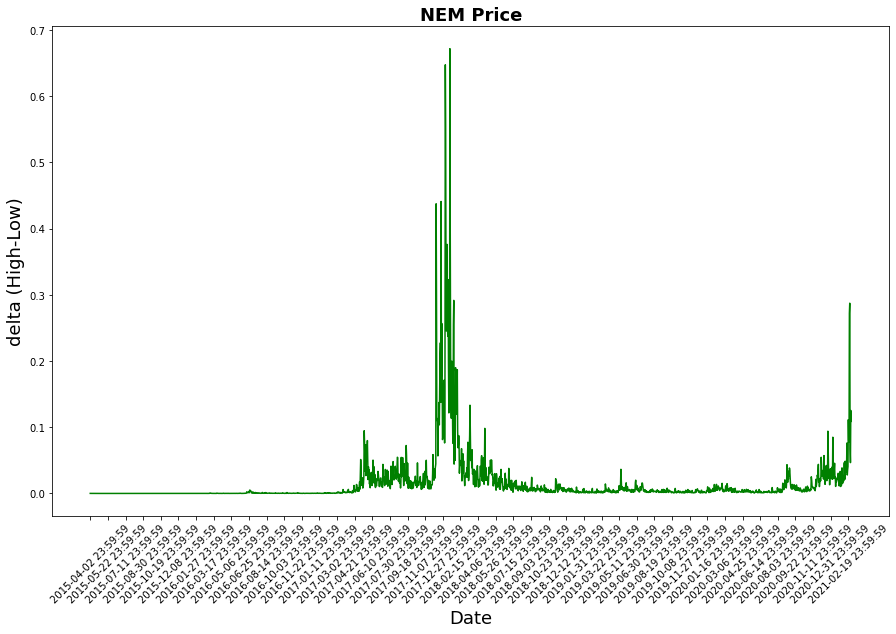

In [22]:
data['Delta'] = data['High'] - data['Low']
delta = data['High'] - data['Low']
plt.figure(figsize = (15,9))
plt.plot(delta,'g')
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("NEM Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('delta (High-Low)',fontsize=18)
plt.show()

## LSTM
Long-Short Term Memory (LSTM) is a type of RNN that allows us to process not only single data points (such as images) but also entire sequences of data (such as speech or video). They are a great choice for time series forecasting, and they are the type of architecture we will be using today.

In [23]:
from preprocess_script import preprocess
scaler = MinMaxScaler()
close_price = data.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [24]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

# Sequence Prediction with LSTMs
Creation of a problem that involves using historical sequence information to predict the next value or values in the sequence.LSTMs work by learning a function (f(…)) that maps input sequence values (X) onto output sequence values (y).

In [ ]:

SEQ_LEN = 100
X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.99)

In [ ]:
print('The model will be using 2623 sequences and will be shifting 1 day per window that has length of 99')
len(X_train)

In [ ]:
import keras

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),input_shape=(WINDOW_SIZE, X_train.shape[-1])
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM((WINDOW_SIZE * 2), return_sequences=True)
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM(WINDOW_SIZE, return_sequences=False)
))

model.add(Dense(units=1))

model.add(Activation('linear'))

In [34]:
BATCH_SIZE = 64

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/30
25/28 [=========================>....] - ETA: 4s - loss: 0.0083Collecting tensorflow==2.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



28/28 [==============================] - 68s 2s/step - loss: 0.0092 - val_loss: 0.0013
Epoch 2/30
28/28 [==============================] - 43s 2s/step - loss: 0.0081 - val_loss: 0.0038
Epoch 3/30
28/28 [==============================] - 43s 2s/step - loss: 0.0035 - val_loss: 0.0012
Epoch 4/30
28/28 [==============================] - 43s 2s/step - loss: 0.0110 - val_loss: 4.6985e-04
Epoch 5/30
28/28 [==============================] - 43s 2s/step - loss: 0.0097 - val_loss: 2.1803e-04
Epoch 6/30
28/28 [==============================] - 43s 2s/step - loss: 0.0055 - val_loss: 1.0266e-04
Epoch 7/30
28/28 [==============================] - 43s 2s/step - loss: 0.0020 - val_loss: 1.8361e-04
Epoch 8/30
28/28 [==============================] - 44s 2s/step - loss: 0.0065 - val_loss: 3.2173e-04
Epoch 9/30
28/28 [==============================] - 43s 2s/step - loss: 0.0092 - val_loss: 0.0018
Epoch 10/30
28/28 [==============================] - 43s 2s/step - loss: 0.0088 - val_loss: 6.3417e-04
Epoch 

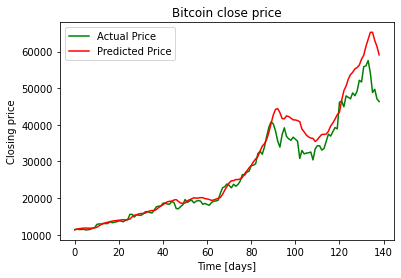

In [55]:
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')

plt.title('Bitcoin close price')
plt.xlabel('Time [days]')
plt.ylabel('Closing price')
plt.legend(loc='best')
 
plt.show();

In [35]:
y_hat = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

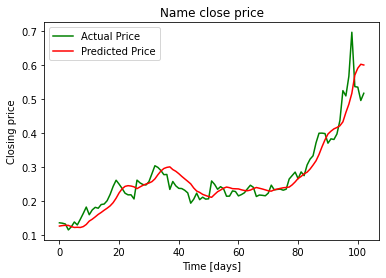

In [37]:
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')

plt.title('Name close price')
plt.xlabel('Time [days]')
plt.ylabel('Closing price')
plt.legend(loc='best')
 
plt.show();